# Exploratory Data Analysis - Final Traffic Accident Dataset

This notebook performs comprehensive exploratory data analysis on the final traffic accident dataset (`data/final/data.csv`).

At the end, we will create a new CSV file called `data/final/data_post_eda.csv` and filter out outliers.

## Install required packages

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Variables

In [3]:
data_folder = "../../data"
final_data_folder = f"{data_folder}/final"

data_csv = f"{final_data_folder}/data.csv"
data_post_eda_csv = f"{final_data_folder}/data_post_eda.csv"

## Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv(data_csv)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")
print(f"\nDataset info:")
display(df.info())

Dataset shape: (219, 54)
Number of rows: 219
Number of columns: 54
Column names: ['id', 'date_published', 'accident_datetime', 'accident_severity', 'total_injured', 'city', 'street', 'accident_time_category', 'driver_under_18', 'driver_18_to_24', 'driver_25_to_49', 'driver_50_to_64', 'driver_65_plus', 'driver_age_unknown', 'num_drivers_under_18', 'num_drivers_18_to_24', 'num_drivers_25_to_49', 'num_drivers_50_to_64', 'num_drivers_65_plus', 'num_drivers_age_unknown', 'driver_male', 'driver_female', 'driver_gender_unknown', 'num_drivers_male', 'num_drivers_female', 'num_drivers_gender_unknown', 'num_drivers_total', 'vehicle_unknown', 'vehicle_pedestrian', 'vehicle_bicycle', 'vehicle_motorbike', 'vehicle_car', 'vehicle_van', 'vehicle_bus', 'num_vehicle_unknown', 'num_vehicle_pedestrian', 'num_vehicle_bicycle', 'num_vehicle_motorbike', 'num_vehicle_car', 'num_vehicle_van', 'num_vehicle_bus', 'is_weekend', 'is_public_holiday_mt', 'is_school_holiday_mt', 'is_school_day_mt', 'street_type', 'r

None

### Missing Values

Check for any missing values.

In [5]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(f"\nColumns with missing values: {len(missing_df)}")


Columns with missing values: 0


### Basic Statistical Summary

Use pandas to output statistics on both numerical & categorial columns.

In [6]:
df.describe()

,total_injured,num_drivers_under_18,num_drivers_18_to_24,num_drivers_25_to_49,num_drivers_50_to_64,num_drivers_65_plus,num_drivers_age_unknown,num_drivers_male,num_drivers_female,num_drivers_gender_unknown,...,num_vehicle_bicycle,num_vehicle_motorbike,num_vehicle_car,num_vehicle_van,num_vehicle_bus,temperature_max,temperature_min,temperature_mean,precipitation_sum,windspeed_max
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.333333,0.036530,0.205479,0.744292,0.260274,0.205479,0.214612,1.114155,0.310502,0.242009,...,0.031963,0.497717,0.858447,0.141553,0.050228,23.938813,18.605936,21.123744,1.112785,20.718721
std,1.046327,0.188034,0.448000,0.759286,0.498458,0.458125,0.501892,0.717239,0.519729,0.516576,...,0.176306,0.561571,0.644710,0.374728,0.218916,6.239876,4.989651,5.445155,5.172929,9.788767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.400000,9.000000,11.800000,0.000000,6.100000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,13.900000,16.000000,0.000000,12.900000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000,18.600000,21.200000,0.000000,19.400000
75%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,29.500000,23.250000,26.100000,0.400000,26.350000
max,9.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,1.000000,3.000000,3.000000,2.000000,1.000000,37.500000,26.400000,31.100000,66.500000,53.400000


In [7]:
df.describe(include='object')

,id,date_published,accident_datetime,accident_severity,city,street,accident_time_category,street_type,region,traffic_level
count,219,219,219,219,219,219,219,219,219,219
unique,219,142,211,5,56,137,6,6,5,3
top,article_3834.0,07/08/2025,2025-03-16 08:00:00,grievious,naxxar,regional road,afternoon,secondary,Northern,LOW
freq,1,5,2,87,18,9,68,68,62,182


### Outliers

Data collection happened between 2024-2025. However, when doing manual auditing, we noticed some news articles reporting accidents that have happened some years back.

These accidents could have happened under different conditions (different road conditions, traffic situations, etcetera) so we consider these accidents as outliers and will filter them out.

Accidents by Year:


accident_datetime
2006      1
2017      1
2018      1
2020      1
2022      2
2023      2
2024     23
2025    188
Name: count, dtype: int64

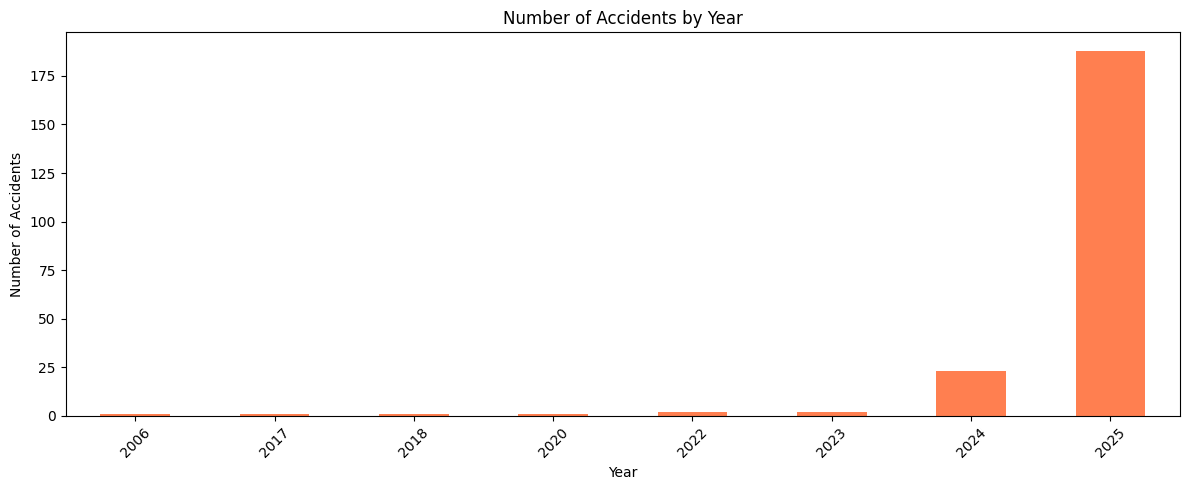

In [8]:
df["accident_datetime"] = pd.to_datetime(df["accident_datetime"])

accidents_by_year = df["accident_datetime"].dt.year.value_counts().sort_index()

print("Accidents by Year:")
display(accidents_by_year)

plt.figure(figsize=(12, 5))
accidents_by_year.plot(kind='bar', color='coral')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's filter out accidents that happened before 2024.

In [9]:
count_before = len(df)
df = df[df["accident_datetime"] >= "2024-01-01"]
count_after = len(df)

print(f"Removed {count_before - count_after} outliers")
print(f"Dataset shape after removing outliers: {df.shape}")

Removed 8 outliers
Dataset shape after removing outliers: (211, 54)


### Accident Severity Analysis

In [10]:
severity_counts = df['accident_severity'].value_counts()
print("Accident Severity Distribution:")
print(severity_counts)

print(f"\nTotal accidents: {severity_counts.sum()}")

Accident Severity Distribution:
accident_severity
grievious      85
serious        74
fatal          28
not injured    17
slight          7
Name: count, dtype: int64

Total accidents: 211


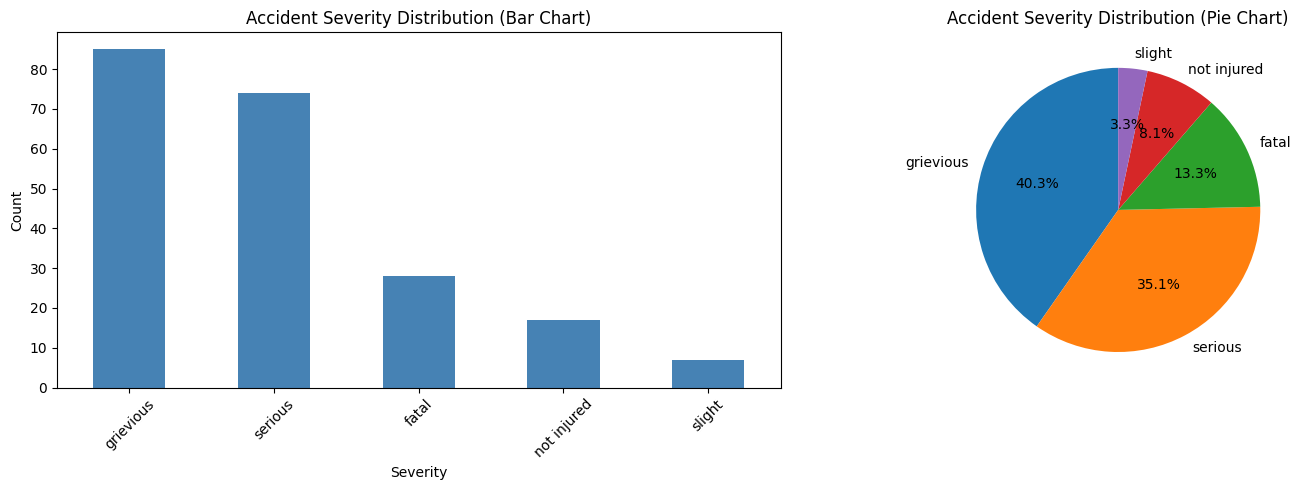

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# bar plot
severity_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Accident Severity Distribution (Bar Chart)')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# pie chart
axes[1].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Accident Severity Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

The distribution of the `accident_severity` target variable is highly imbalanced, with certain classes containing very few samples. Given the limited dataset size (219 instances), this results in insufficient per-class representation for reliable multi-class learning.

To tackle this issue, the problem is reformulated as a binary classification task, where we attempt to classify fatal vs non fatal accidents.

In [12]:
fatal_buckets = {"fatal"}
non_fatal_buckets = {"grievious", "serious", "not injured", "slight"}

df["is_fatal"] = df["accident_severity"].map(lambda x: 0 if x in non_fatal_buckets else 1)

summarised_fatality = df["is_fatal"].value_counts()
print("Fatality Distribution:")
print(summarised_fatality)

Fatality Distribution:
is_fatal
0    183
1     28
Name: count, dtype: int64


### Temporal Analysis

In [13]:
df['accident_datetime'] = pd.to_datetime(df['accident_datetime'])
df['accident_year'] = df['accident_datetime'].dt.year
df['accident_month'] = df['accident_datetime'].dt.month
df['accident_day_of_week'] = df['accident_datetime'].dt.dayofweek
df['accident_hour'] = df['accident_datetime'].dt.hour

print("Temporal features extracted successfully!")

Temporal features extracted successfully!


#### Accidents by Year

Distribution of fatal vs. non-fatal accidents based on year of accident:
               non_fatal  fatal  total  fatal_rate
accident_year                                     
2024                  21      2     23    0.086957
2025                 162     26    188    0.138298


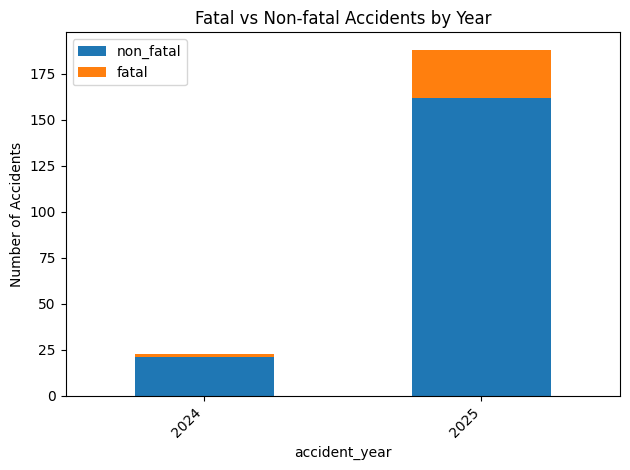

In [14]:
accidents_by_year_stats = (
    df
    .groupby("accident_year")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

accidents_by_year_stats.columns = ["non_fatal", "fatal"]

accidents_by_year_stats["total"] = accidents_by_year_stats["non_fatal"] + accidents_by_year_stats["fatal"]
accidents_by_year_stats["fatal_rate"] = accidents_by_year_stats["fatal"] / accidents_by_year_stats["total"]

print("Distribution of fatal vs. non-fatal accidents based on year of accident:")
print(accidents_by_year_stats)

accidents_by_year_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Year")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Accidents by Month

Distribution of fatal vs. non-fatal accidents based on month of accident:
                non_fatal  fatal  total  fatal_rate
accident_month                                     
1                      11      4     15    0.266667
2                      19      1     20    0.050000
3                      13      0     13    0.000000
4                      14      0     14    0.000000
5                      16      1     17    0.058824
6                      14      6     20    0.300000
7                      18      6     24    0.250000
8                      26      8     34    0.235294
9                      22      0     22    0.000000
10                     11      0     11    0.000000
12                     19      2     21    0.095238


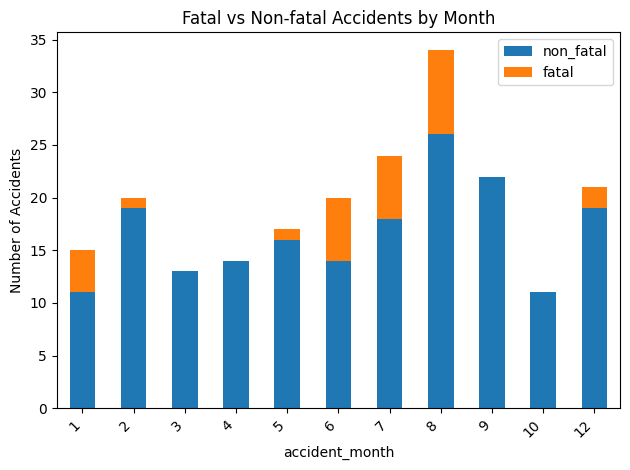

In [15]:
accidents_by_month_stats = (
    df
    .groupby("accident_month")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

accidents_by_month_stats.columns = ["non_fatal", "fatal"]

accidents_by_month_stats["total"] = accidents_by_month_stats["non_fatal"] + accidents_by_month_stats["fatal"]
accidents_by_month_stats["fatal_rate"] = accidents_by_month_stats["fatal"] / accidents_by_month_stats["total"]

print("Distribution of fatal vs. non-fatal accidents based on month of accident:")
print(accidents_by_month_stats)

accidents_by_month_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Month")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Accidents by Day Of Week

Distribution of fatal vs. non-fatal accidents based on day of week of accident:
                      non_fatal  fatal  total  fatal_rate
accident_day_of_week                                     
0                            20      7     27    0.259259
1                            18      1     19    0.052632
2                            29      5     34    0.147059
3                            37      7     44    0.159091
4                            27      1     28    0.035714
5                            23      3     26    0.115385
6                            29      4     33    0.121212


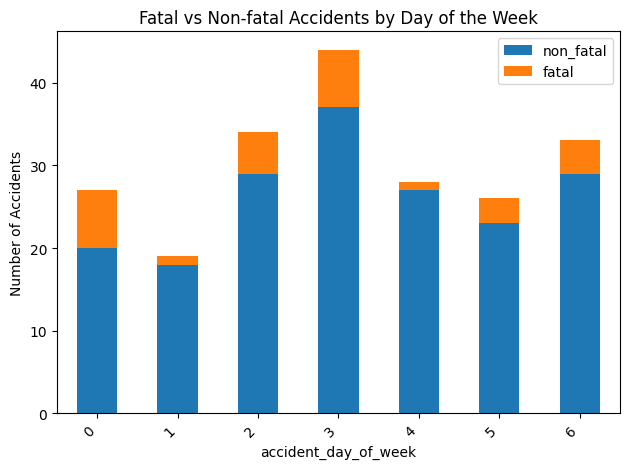

In [16]:
accidents_by_day_stats = (
    df
    .groupby("accident_day_of_week")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

accidents_by_day_stats.columns = ["non_fatal", "fatal"]

accidents_by_day_stats["total"] = accidents_by_day_stats["non_fatal"] + accidents_by_day_stats["fatal"]
accidents_by_day_stats["fatal_rate"] = accidents_by_day_stats["fatal"] / accidents_by_day_stats["total"]

print("Distribution of fatal vs. non-fatal accidents based on day of week of accident:")
print(accidents_by_day_stats)

accidents_by_day_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Day of the Week")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Accidents by time of day

Distribution of fatal vs. non-fatal accidents based on accident time of day:
                        non_fatal  fatal  total  fatal_rate
accident_time_category                                     
afternoon                      56     11     67    0.164179
early_morning                  25      0     25    0.000000
evening                        19      4     23    0.173913
late_evening                    9      4     13    0.307692
morning                        41      4     45    0.088889
night                          33      5     38    0.131579


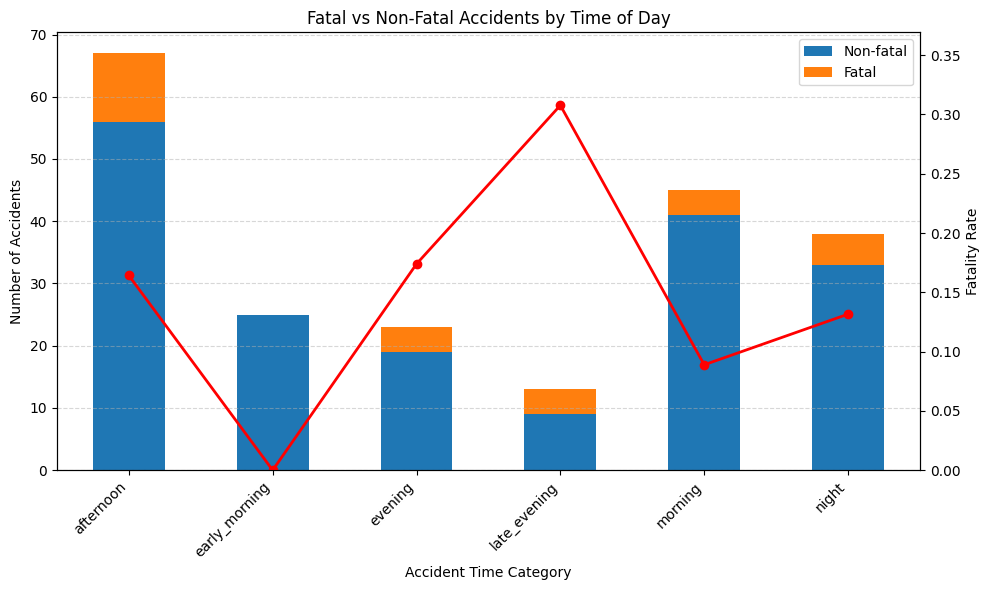

In [17]:
accident_time_category_stats = (
    df
    .groupby("accident_time_category")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

accident_time_category_stats.columns = ["non_fatal", "fatal"]

accident_time_category_stats["total"] = accident_time_category_stats["non_fatal"] + accident_time_category_stats["fatal"]
accident_time_category_stats["fatal_rate"] = accident_time_category_stats["fatal"] / accident_time_category_stats["total"]

print("Distribution of fatal vs. non-fatal accidents based on accident time of day:")
print(accident_time_category_stats)

fig, ax1 = plt.subplots(figsize=(10, 6))

accident_time_category_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True,
    ax=ax1
)

ax1.set_ylabel("Number of Accidents")
ax1.set_xlabel("Accident Time Category")
ax1.set_title("Fatal vs Non-Fatal Accidents by Time of Day")

ax1.set_xticklabels(
    accident_time_category_stats.index,
    rotation=45,
    ha="right"
)

ax2 = ax1.twinx()
ax2.plot(
    accident_time_category_stats.index,
    accident_time_category_stats["fatal_rate"],
    marker="o",
    linewidth=2,
    color="red"
)

ax2.set_ylabel("Fatality Rate")
ax2.set_ylim(0, accident_time_category_stats["fatal_rate"].max() * 1.2)

bars_legend = ax1.get_legend_handles_labels()
line_legend = ax2.get_legend_handles_labels()

ax1.legend(
    bars_legend[0] + line_legend[0],
    ["Non-fatal", "Fatal", "Fatality rate"],
    loc="upper right"
)

ax1.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### Location Analysis

#### Top 10 cities with the most accidents

Top 5 Cities with Most Accidents:
city
naxxar               18
san pawl il bahar    10
marsa                10
paola                 9
sliema                7
Name: count, dtype: int64


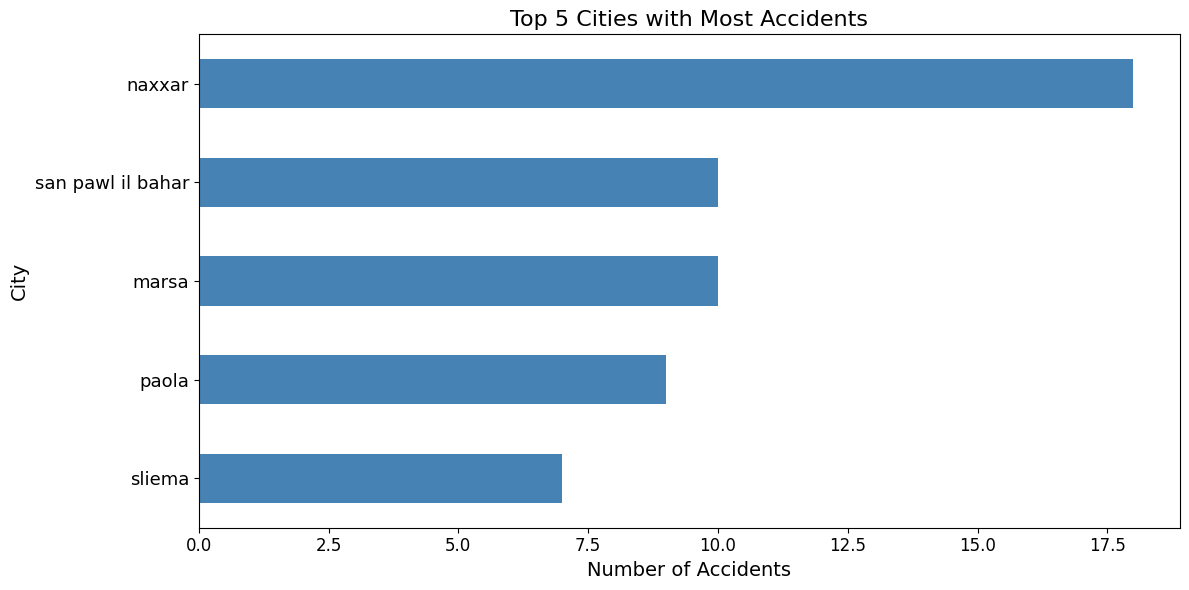

In [18]:
top_cities = df['city'].value_counts().head(5)
print("Top 5 Cities with Most Accidents:")
print(top_cities)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh', color='steelblue')

plt.title('Top 5 Cities with Most Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('City', fontsize=14)

plt.yticks(fontsize=13)
plt.xticks(fontsize=12)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Top 5 cities with the most fatalities

Top 5 Cities with Most Fatal Accidents:
city
isla        3
valletta    3
pembroke    3
floriana    3
zebbug      2
Name: count, dtype: int64


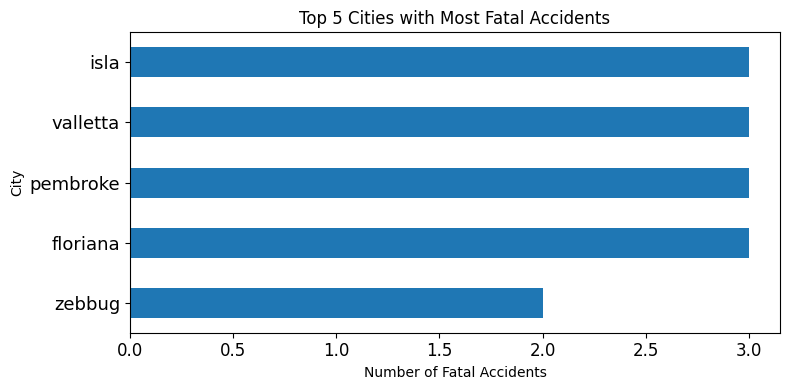

In [19]:
fatal_df = df[df['is_fatal'] == 1]

top_5_fatal_cities = fatal_df['city'].value_counts().head(5)

print("Top 5 Cities with Most Fatal Accidents:")
print(top_5_fatal_cities)

plt.figure(figsize=(8, 4))
top_5_fatal_cities.plot(kind='barh')
plt.title('Top 5 Cities with Most Fatal Accidents')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('City')
plt.yticks(fontsize=13)
plt.xticks(fontsize=12)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Analysis by region

                  non_fatal  fatal  total  fatal_rate
region                                               
Central                  49      9     58    0.155172
Gozo                     14      0     14    0.000000
Northern                 53      5     58    0.086207
South Eastern            31      4     35    0.114286
Southern Harbour         36     10     46    0.217391


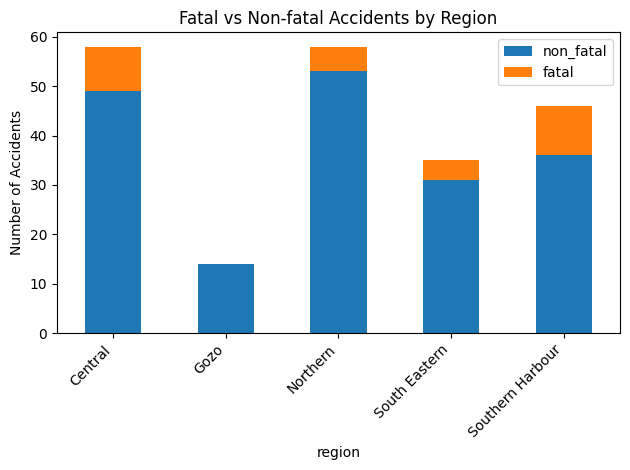

In [20]:
region_category_stats = (
    df
    .groupby("region")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

region_category_stats.columns = ["non_fatal", "fatal"]

region_category_stats["total"] = region_category_stats["non_fatal"] + region_category_stats["fatal"]
region_category_stats["fatal_rate"] = region_category_stats["fatal"] / region_category_stats["total"]

print(region_category_stats)

region_category_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Analysis by street type

             non_fatal  fatal  total  fatal_rate
street_type                                     
other                6      3      9    0.333333
primary             29      4     33    0.121212
residential         41      3     44    0.068182
secondary           59      6     65    0.092308
tertiary             8      0      8    0.000000
trunk               40     12     52    0.230769


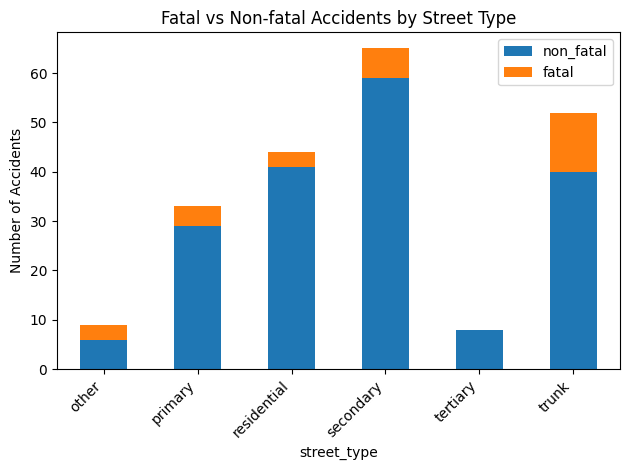

In [21]:
street_type_category_stats = (
    df
    .groupby("street_type")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

street_type_category_stats.columns = ["non_fatal", "fatal"]

street_type_category_stats["total"] = street_type_category_stats["non_fatal"] + street_type_category_stats["fatal"]
street_type_category_stats["fatal_rate"] = street_type_category_stats["fatal"] / street_type_category_stats["total"]

print(street_type_category_stats)

street_type_category_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Street Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Driver Demographics Analysis

#### Gender of drivers

Total drivers involved in accidents: 350

Driver Gender Distribution:
Male drivers: 232 (66.3%)
Female drivers: 67 (19.1%)
Unknown gender: 51 (14.6%)


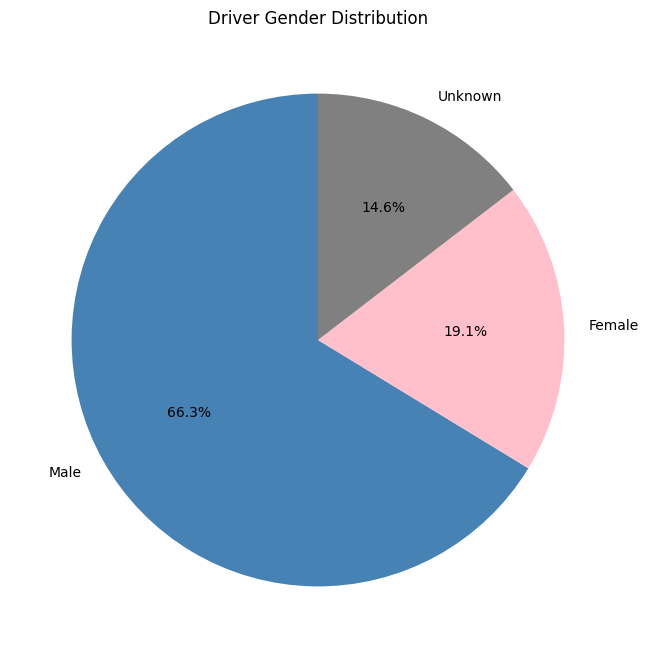

In [22]:
total_drivers = df['num_drivers_total'].sum()
print(f"Total drivers involved in accidents: {total_drivers}")

male_drivers = df['num_drivers_male'].sum()
female_drivers = df['num_drivers_female'].sum()
unknown_gender = df['num_drivers_gender_unknown'].sum()

print(f"\nDriver Gender Distribution:")
print(f"Male drivers: {male_drivers} ({male_drivers/total_drivers*100:.1f}%)")
print(f"Female drivers: {female_drivers} ({female_drivers/total_drivers*100:.1f}%)")
print(f"Unknown gender: {unknown_gender} ({unknown_gender/total_drivers*100:.1f}%)")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie([male_drivers, female_drivers, unknown_gender], 
       labels=['Male', 'Female', 'Unknown'], 
       autopct='%1.1f%%', 
       startangle=90,
       colors=['steelblue', 'pink', 'gray'])
ax.set_title('Driver Gender Distribution')
plt.show()

#### Age of drivers

Stats for 'num_drivers_male' column
                  accidents  fatal  fatality_rate
num_drivers_male                                 
1                       120     20       0.166667
2                        48      3       0.062500
3                         4      2       0.500000
4                         1      0       0.000000


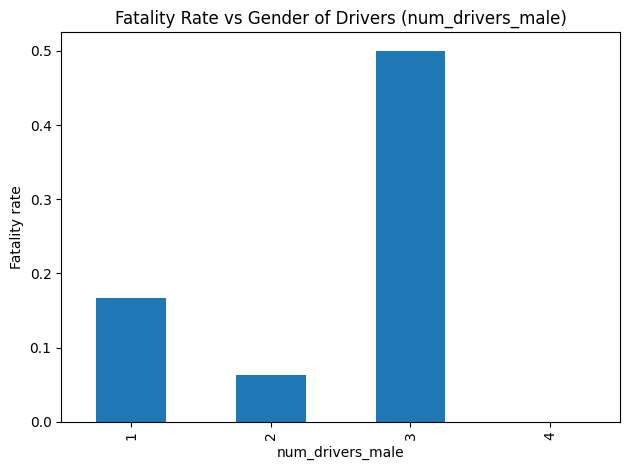

Stats for 'num_drivers_female' column
                    accidents  fatal  fatality_rate
num_drivers_female                                 
1                          55      2       0.036364
2                           6      2       0.333333


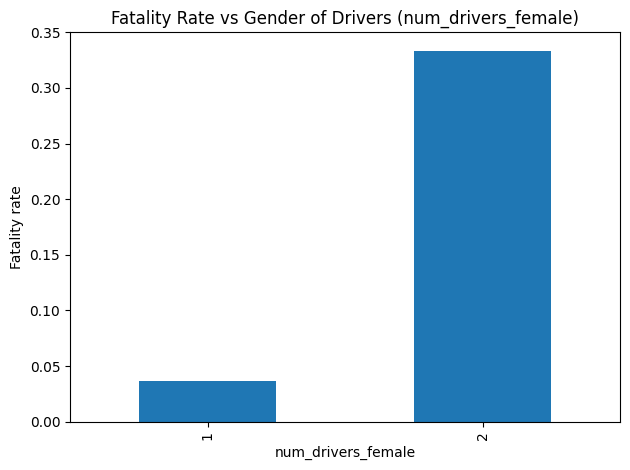

Stats for 'num_drivers_gender_unknown' column
                            accidents  fatal  fatality_rate
num_drivers_gender_unknown                                 
1                                  33      7       0.212121
2                                   9      0       0.000000


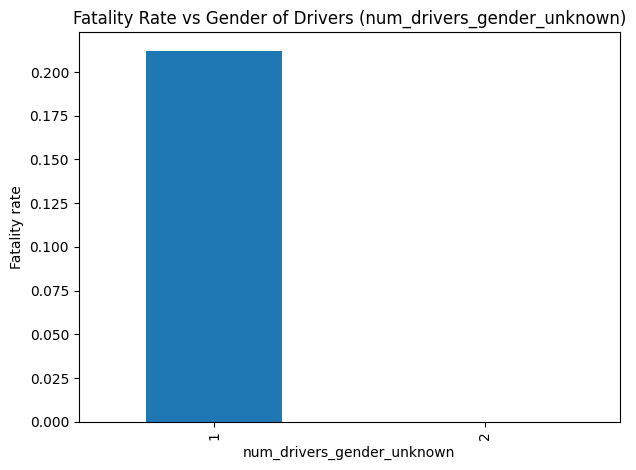

In [23]:
numerical_gender_buckets = [
    "num_drivers_male",
    "num_drivers_female",
    "num_drivers_gender_unknown",
]

for col in numerical_gender_buckets:
    filtered = df[df[col] > 0]

    if filtered.empty:
        continue # nothing to report

    numeric_gender_stats = (
        filtered
        .groupby(col)["is_fatal"]
        .agg(
            accidents="count",
            fatal="sum",
            fatality_rate="mean"
        )
    )

    print(f"Stats for '{col}' column")
    print(numeric_gender_stats)

    numeric_gender_stats["fatality_rate"].plot(kind="bar")
    plt.title(f"Fatality Rate vs Gender of Drivers ({col})")
    plt.ylabel("Fatality rate")
    plt.tight_layout()
    plt.show()

Driver Age Distribution:
Under 18: 8 (2.3%)
18-24: 44 (12.6%)
25-49: 156 (44.6%)
50-64: 57 (16.3%)
65+: 44 (12.6%)
Unknown: 41 (11.7%)


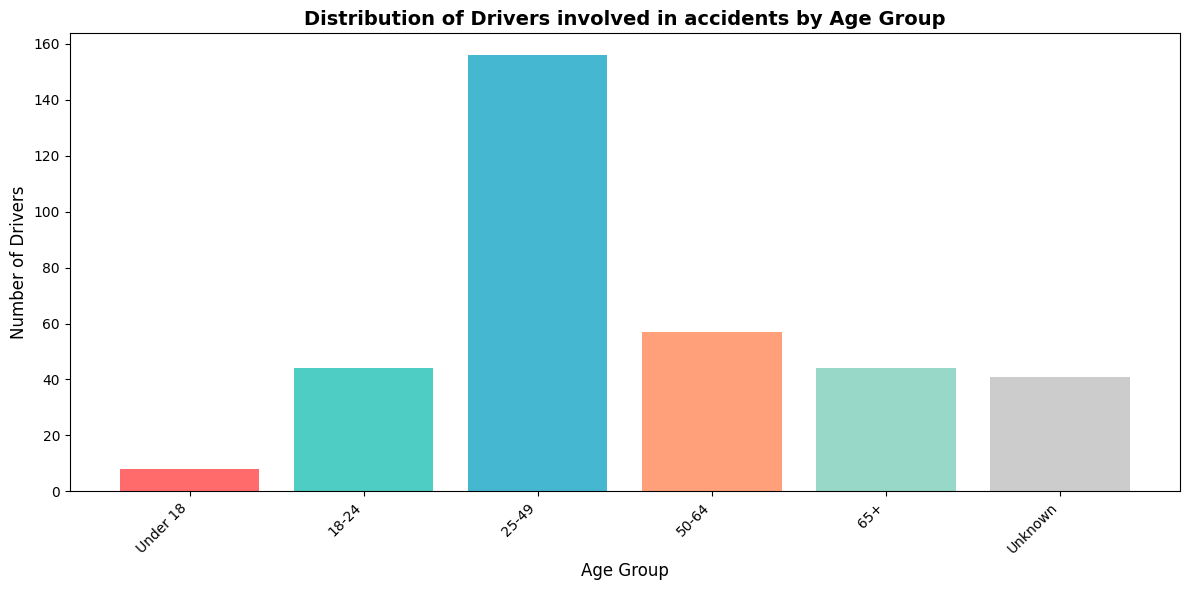

In [24]:
driver_ages = {
    'Under 18': df['num_drivers_under_18'].sum(),
    '18-24': df['num_drivers_18_to_24'].sum(),
    '25-49': df['num_drivers_25_to_49'].sum(),
    '50-64': df['num_drivers_50_to_64'].sum(),
    '65+': df['num_drivers_65_plus'].sum(),
    'Unknown': df['num_drivers_age_unknown'].sum()
}

print("Driver Age Distribution:")
for age_group, count in driver_ages.items():
    print(f"{age_group}: {count:,} ({count/total_drivers*100:.1f}%)")

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#CCCCCC']
plt.bar(driver_ages.keys(), driver_ages.values(), color=colors)
plt.title('Distribution of Drivers involved in accidents by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Drivers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Stats for 'num_drivers_under_18' column
                      accidents  fatal  fatality_rate
num_drivers_under_18                                 
1                             8      2           0.25


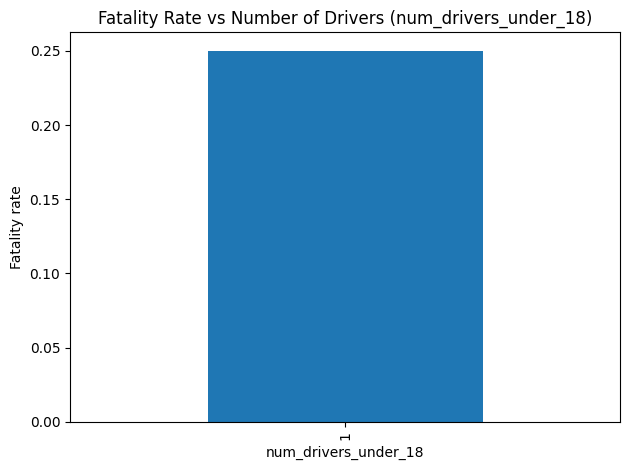

Stats for 'num_drivers_18_to_24' column
                      accidents  fatal  fatality_rate
num_drivers_18_to_24                                 
1                            36      8       0.222222
2                             4      2       0.500000


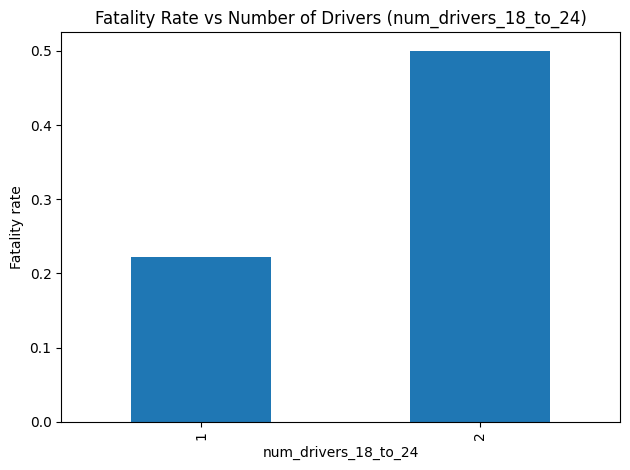

Stats for 'num_drivers_25_to_49' column
                      accidents  fatal  fatality_rate
num_drivers_25_to_49                                 
1                            84     11       0.130952
2                            34      3       0.088235
4                             1      0       0.000000


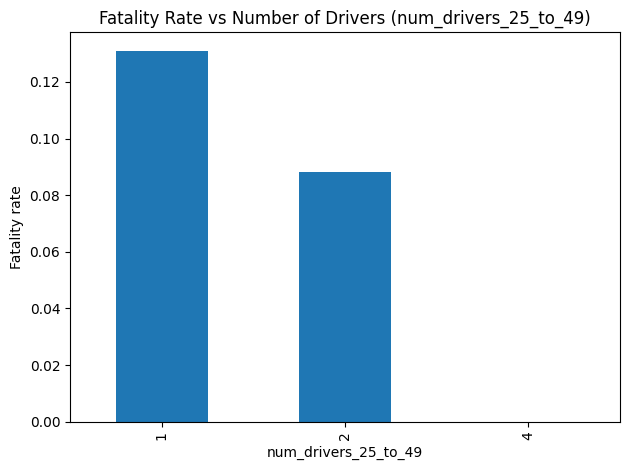

Stats for 'num_drivers_50_to_64' column
                      accidents  fatal  fatality_rate
num_drivers_50_to_64                                 
1                            45      5       0.111111
2                             6      1       0.166667


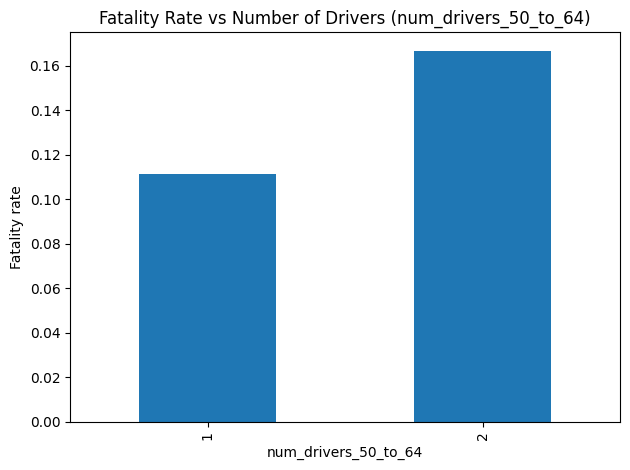

Stats for 'num_drivers_65_plus' column
                     accidents  fatal  fatality_rate
num_drivers_65_plus                                 
1                           34      3       0.088235
2                            5      1       0.200000


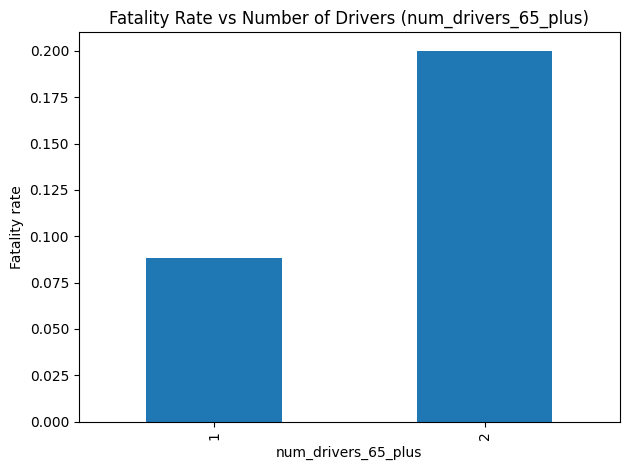

Stats for 'num_drivers_age_unknown' column
                         accidents  fatal  fatality_rate
num_drivers_age_unknown                                 
1                               27      2       0.074074
2                                7      0       0.000000


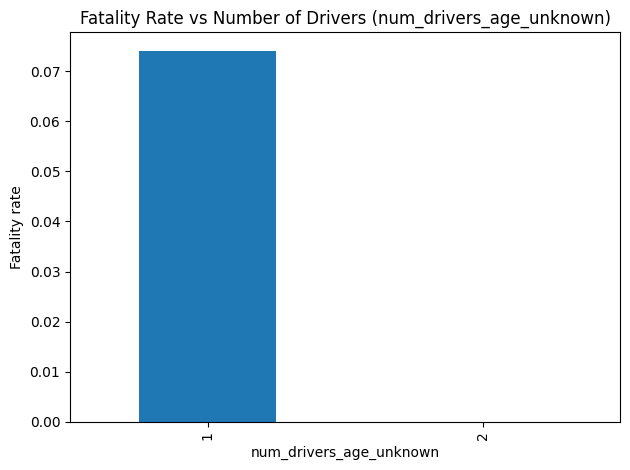

In [25]:
numerical_age_buckets = [
    "num_drivers_under_18",
    "num_drivers_18_to_24",
    "num_drivers_25_to_49",
    "num_drivers_50_to_64",
    "num_drivers_65_plus",
    "num_drivers_age_unknown",
]

for col in numerical_age_buckets:
    filtered = df[df[col] > 0]

    if filtered.empty:
        continue # nothing to report

    numeric_age_stats = (
        filtered
        .groupby(col)["is_fatal"]
        .agg(
            accidents="count",
            fatal="sum",
            fatality_rate="mean"
        )
    )

    print(f"Stats for '{col}' column")
    print(numeric_age_stats)

    numeric_age_stats["fatality_rate"].plot(kind="bar")
    plt.title(f"Fatality Rate vs Number of Drivers ({col})")
    plt.ylabel("Fatality rate")
    plt.tight_layout()
    plt.show()

### Vehicle Type Analysis

Vehicle Type Distribution:
Car: 179 (51.1%)
Motorbike: 107 (30.6%)
Van: 30 (8.6%)
Pedestrian: 14 (4.0%)
Bus: 11 (3.1%)
Bicycle: 7 (2.0%)
Unknown: 2 (0.6%)


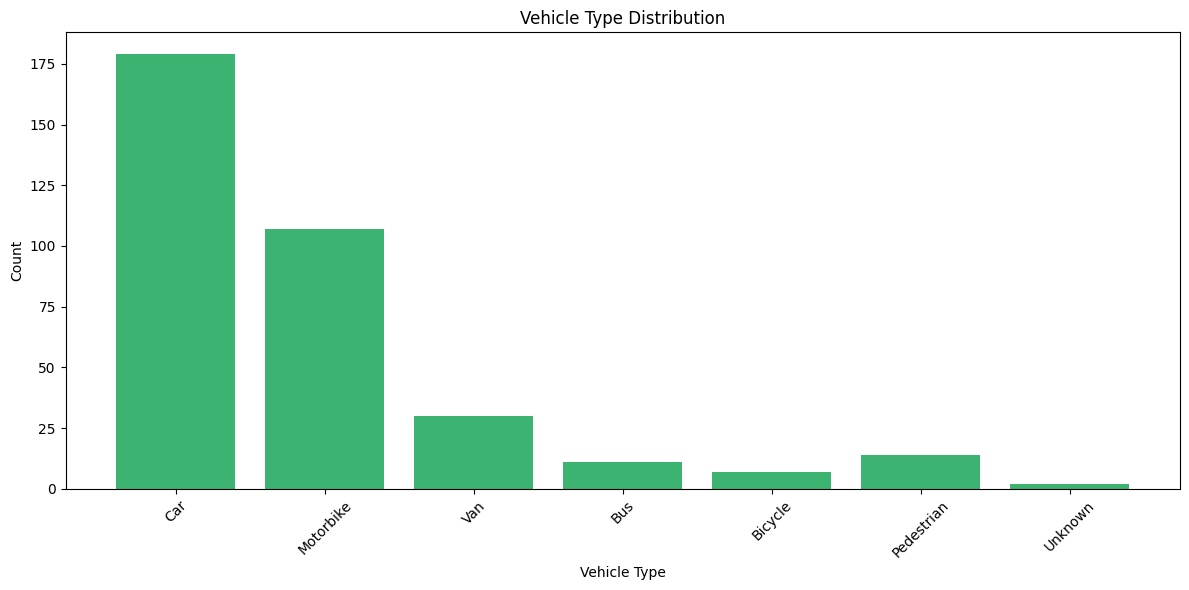

In [26]:
vehicle_types = {
    'Car': df['num_vehicle_car'].sum(),
    'Motorbike': df['num_vehicle_motorbike'].sum(),
    'Van': df['num_vehicle_van'].sum(),
    'Bus': df['num_vehicle_bus'].sum(),
    'Bicycle': df['num_vehicle_bicycle'].sum(),
    'Pedestrian': df['num_vehicle_pedestrian'].sum(),
    'Unknown': df['num_vehicle_unknown'].sum()
}

print("Vehicle Type Distribution:")
for vehicle, count in sorted(vehicle_types.items(), key=lambda x: x[1], reverse=True):
    total_vehicles = sum(vehicle_types.values())
    print(f"{vehicle}: {count} ({count/total_vehicles*100:.1f}%)")

plt.figure(figsize=(12, 6))
plt.bar(vehicle_types.keys(), vehicle_types.values(), color='mediumseagreen')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Stats: num_vehicle_unknown
                     accidents  fatal  fatality_rate
num_vehicle_unknown                                 
1                            2      0            0.0


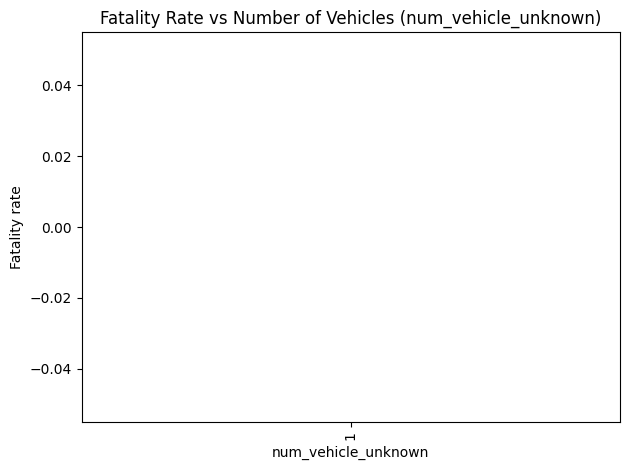

Stats: num_vehicle_pedestrian
                        accidents  fatal  fatality_rate
num_vehicle_pedestrian                                 
1                              12      1       0.083333
2                               1      0       0.000000


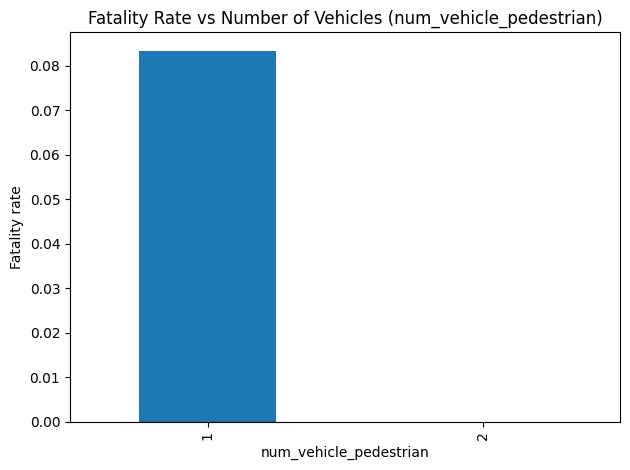

Stats: num_vehicle_bicycle
                     accidents  fatal  fatality_rate
num_vehicle_bicycle                                 
1                            7      1       0.142857


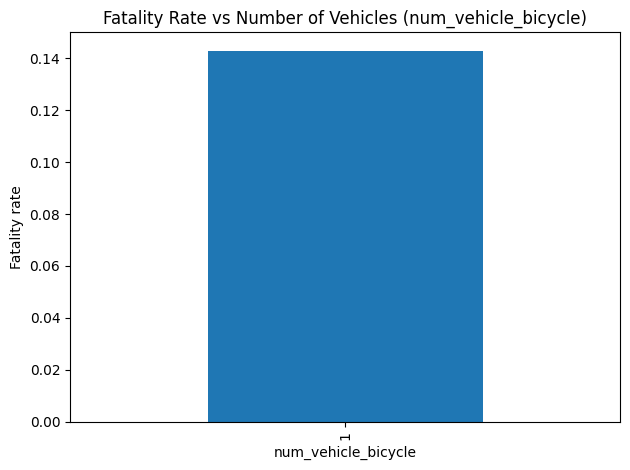

Stats: num_vehicle_motorbike
                       accidents  fatal  fatality_rate
num_vehicle_motorbike                                 
1                             96     12          0.125
2                              4      0          0.000
3                              1      0          0.000


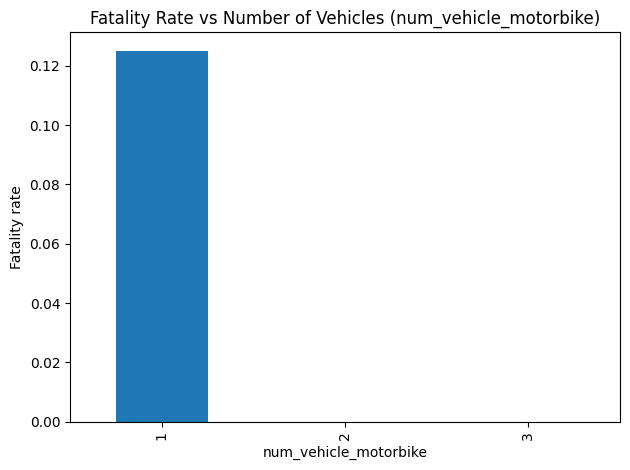

Stats: num_vehicle_car
                 accidents  fatal  fatality_rate
num_vehicle_car                                 
1                      133      9       0.067669
2                       17      4       0.235294
3                        4      2       0.500000


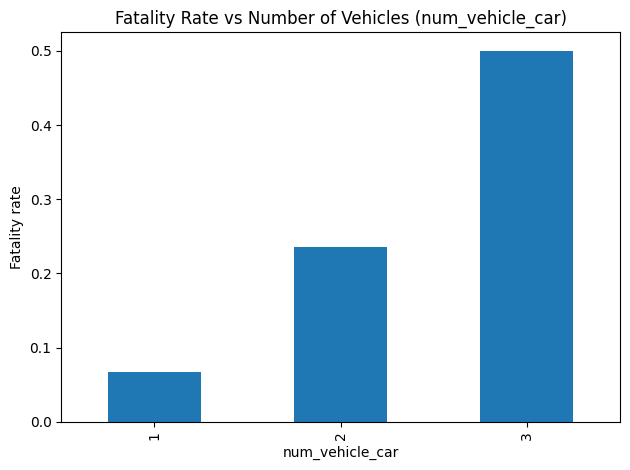

Stats: num_vehicle_van
                 accidents  fatal  fatality_rate
num_vehicle_van                                 
1                       26      3       0.115385
2                        2      1       0.500000


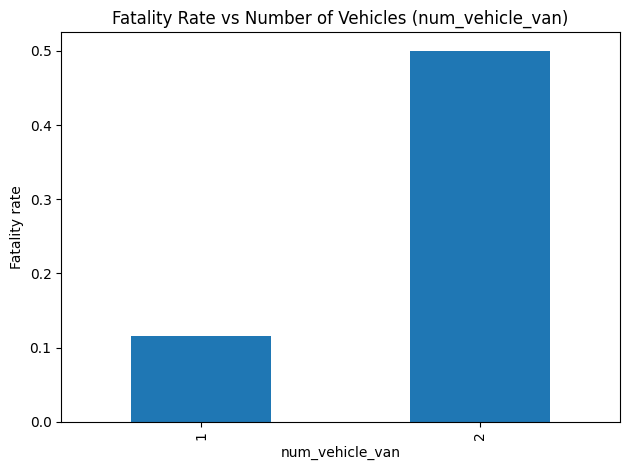

Stats: num_vehicle_bus
                 accidents  fatal  fatality_rate
num_vehicle_bus                                 
1                       11      3       0.272727


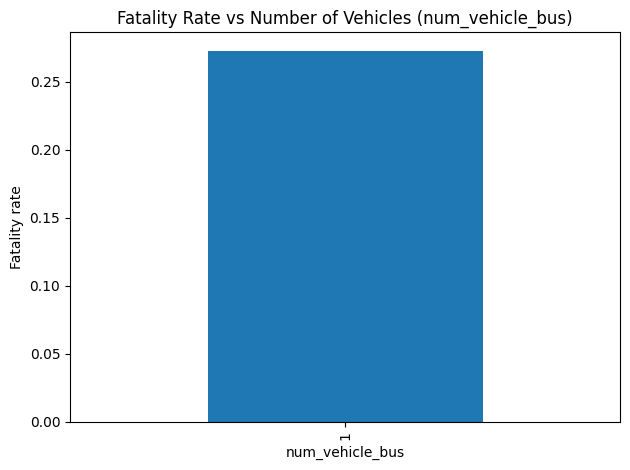

In [27]:
numerical_vehicle_buckets = [
    "num_vehicle_unknown",
    "num_vehicle_pedestrian",
    "num_vehicle_bicycle",
    "num_vehicle_motorbike",
    "num_vehicle_car",
    "num_vehicle_van",
    "num_vehicle_bus",
]

for col in numerical_vehicle_buckets:
    filtered = df[df[col] > 0]

    if filtered.empty:
        continue # nothing to report

    numeric_vehicle_stats = (
        filtered
        .groupby(col)["is_fatal"]
        .agg(
            accidents="count",
            fatal="sum",
            fatality_rate="mean"
        )
    )

    print(f"Stats: {col}")
    print(numeric_vehicle_stats)

    numeric_vehicle_stats["fatality_rate"].plot(kind="bar")
    plt.title(f"Fatality Rate vs Number of Vehicles ({col})")
    plt.ylabel("Fatality rate")
    plt.tight_layout()
    plt.show()

### Injuries Analysis

Total people injured: 282
Average injuries per accident: 1.34


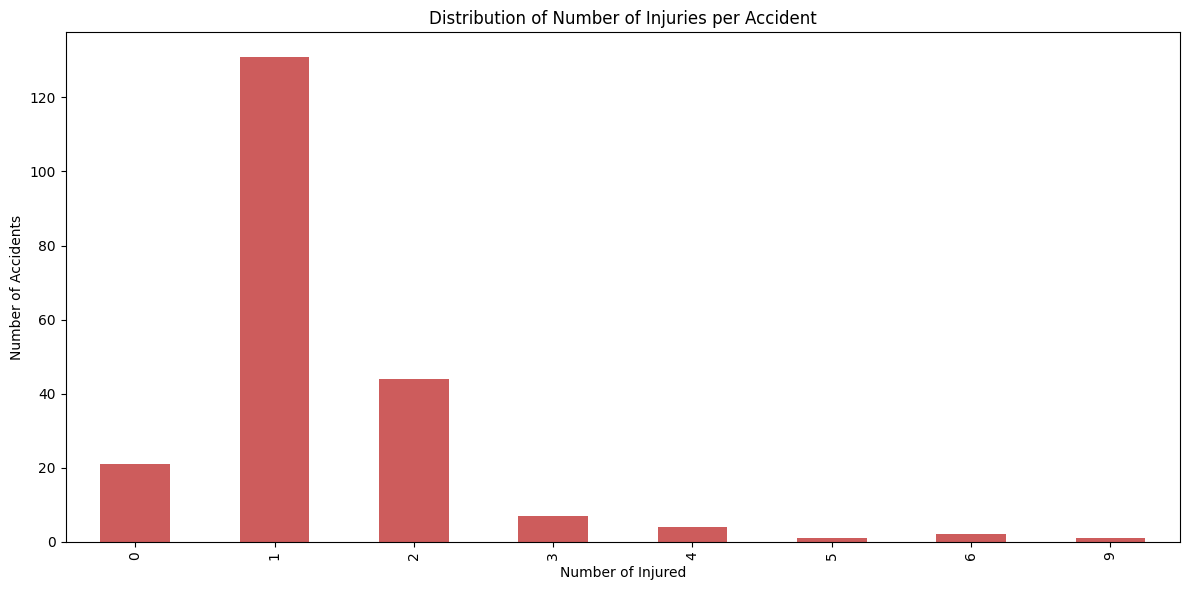

In [28]:
total_injured = df['total_injured'].sum()
print(f"Total people injured: {total_injured}")
print(f"Average injuries per accident: {df['total_injured'].mean():.2f}")

plt.figure(figsize=(12, 6))
df['total_injured'].value_counts().sort_index().plot(kind='bar', color='indianred')
plt.title('Distribution of Number of Injuries per Accident')
plt.xlabel('Number of Injured')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Weather Conditions Analysis

#### Simple Weather Condition Statistics

In [29]:
print("Weather Conditions Summary:")
print(f"Temperature (mean): Min={df['temperature_min'].min():.1f}°C, Max={df['temperature_max'].max():.1f}°C, Avg={df['temperature_mean'].mean():.1f}°C")
print(f"Precipitation (sum): Min={df['precipitation_sum'].min():.1f}mm, Max={df['precipitation_sum'].max():.1f}mm, Avg={df['precipitation_sum'].mean():.1f}mm")
print(f"Wind speed (max): Min={df['windspeed_max'].min():.1f}km/h, Max={df['windspeed_max'].max():.1f}km/h, Avg={df['windspeed_max'].mean():.1f}km/h")

Weather Conditions Summary:
Temperature (mean): Min=9.0°C, Max=37.5°C, Avg=21.2°C
Precipitation (sum): Min=0.0mm, Max=66.5mm, Avg=1.1mm
Wind speed (max): Min=6.1km/h, Max=51.4km/h, Avg=20.4km/h


#### Raining Statistics

In [30]:
rain_counts = df['is_raining'].value_counts()
print(f"\nAccidents during rain: {rain_counts.get(True, 0)} ({rain_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Accidents without rain: {rain_counts.get(False, 0)} ({rain_counts.get(False, 0)/len(df)*100:.1f}%)")


Accidents during rain: 70 (33.2%)
Accidents without rain: 141 (66.8%)


#### Visualise Distributions

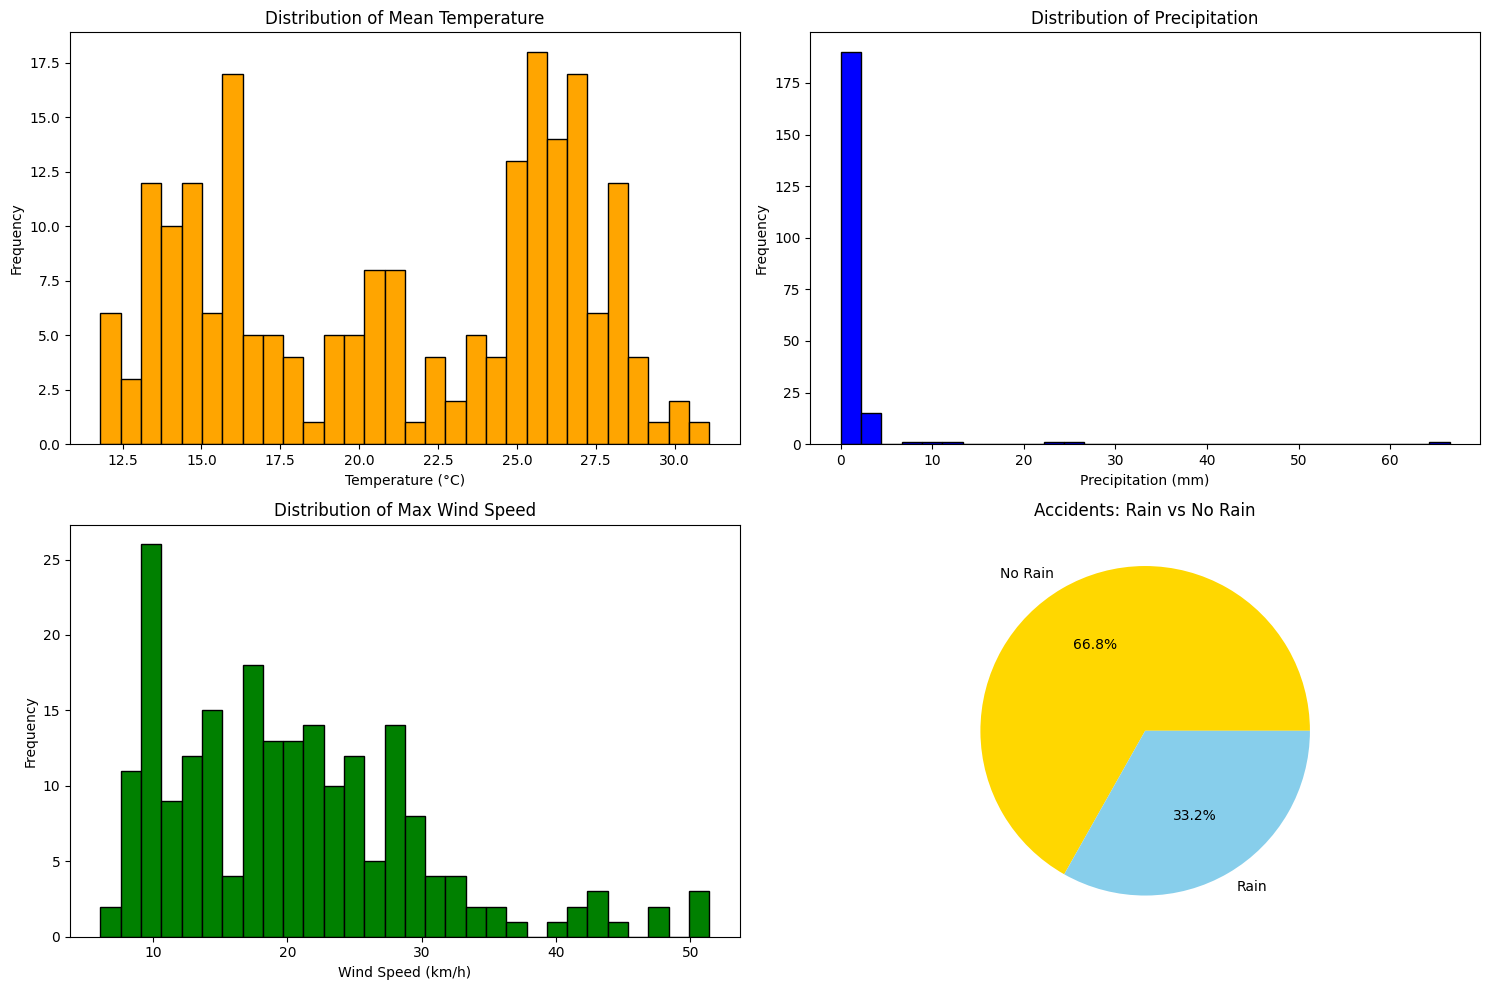

In [31]:
# Visualize weather impact
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature distribution
axes[0, 0].hist(df['temperature_mean'], bins=30, color='orange', edgecolor='black')
axes[0, 0].set_title('Distribution of Mean Temperature')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# Precipitation distribution
axes[0, 1].hist(df['precipitation_sum'], bins=30, color='blue', edgecolor='black')
axes[0, 1].set_title('Distribution of Precipitation')
axes[0, 1].set_xlabel('Precipitation (mm)')
axes[0, 1].set_ylabel('Frequency')

# Wind speed distribution
axes[1, 0].hist(df['windspeed_max'], bins=30, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution of Max Wind Speed')
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('Frequency')

# Rain vs no rain
rain_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', 
                 labels=['No Rain', 'Rain'], colors=['gold', 'skyblue'])
axes[1, 1].set_title('Accidents: Rain vs No Rain')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

#### Investigate temperature conditions between fatal vs. non-fatal

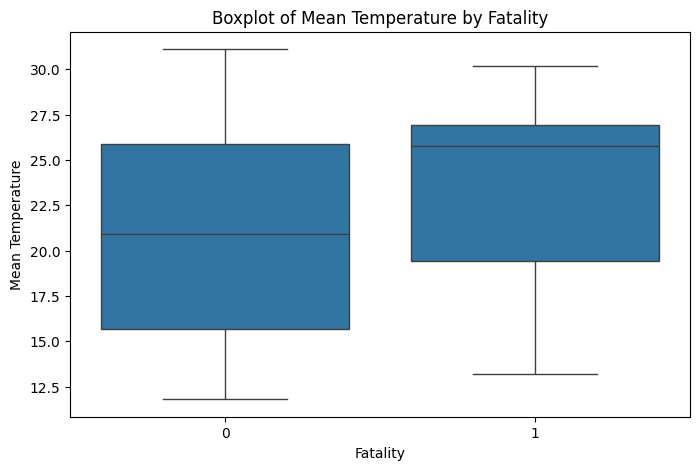

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fatal', y='temperature_mean', data=df)
plt.title('Boxplot of Mean Temperature by Fatality')
plt.xlabel('Fatality')
plt.ylabel('Mean Temperature')
plt.show()

#### Investigate wind conditions between fatal vs. non-fatal

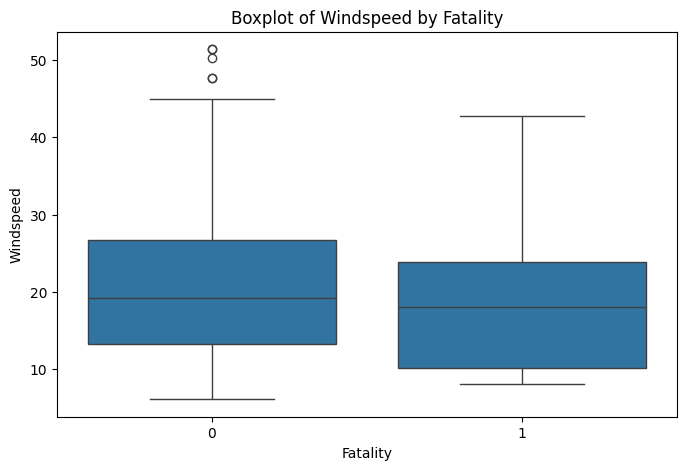

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fatal', y='windspeed_max', data=df)
plt.title('Boxplot of Windspeed by Fatality')
plt.xlabel('Fatality')
plt.ylabel('Windspeed')
plt.show()

#### Investigate rain conditions between fatal vs. non-fatal

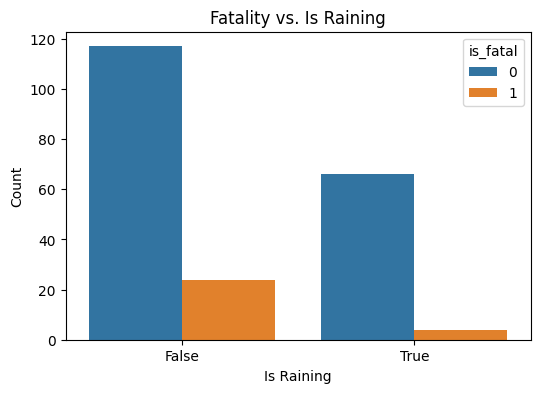

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_raining', hue='is_fatal')
plt.title('Fatality vs. Is Raining')
plt.xlabel('Is Raining')
plt.ylabel('Count')
plt.show()

Interestingly enough, raining seems to be inversely correleated with fatal accidents. It might be that drivers are more careful when it rains. Moreover, in Malta there is not a lot of rain throughout the year so fewer accidents in the rain happen.

### Traffic Level Analysis

               non_fatal  fatal  total  fatal_rate
traffic_level                                     
HEAVY                  5      0      5    0.000000
LOW                  150     25    175    0.142857
MODERATE              28      3     31    0.096774


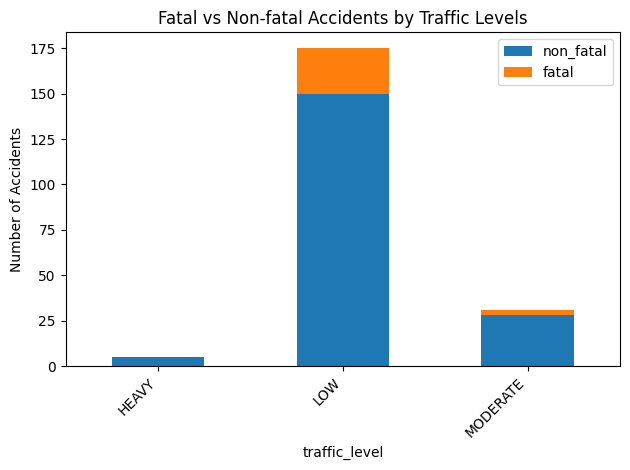

In [35]:
traffic_level_stats = (
    df
    .groupby("traffic_level")["is_fatal"]
    .value_counts()
    .unstack(fill_value=0)
)

traffic_level_stats.columns = ["non_fatal", "fatal"]

traffic_level_stats["total"] = traffic_level_stats["non_fatal"] + traffic_level_stats["fatal"]
traffic_level_stats["fatal_rate"] = traffic_level_stats["fatal"] / traffic_level_stats["total"]

print(traffic_level_stats)

traffic_level_stats[["non_fatal", "fatal"]].plot(
    kind="bar",
    stacked=True
)

plt.ylabel("Number of Accidents")
plt.title("Fatal vs Non-fatal Accidents by Traffic Levels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Special Days Analysis (Weekend, Holidays, School Days)

#### Weekend by Fatality

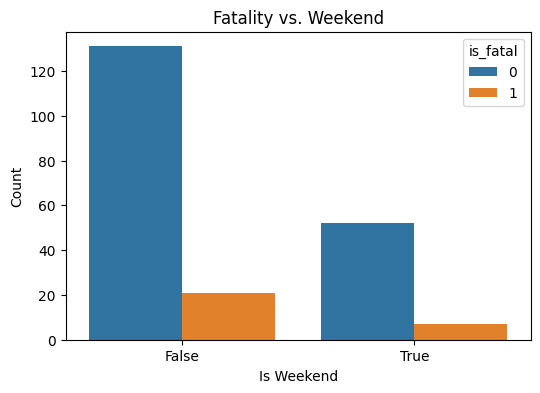

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_weekend', hue='is_fatal')
plt.title('Fatality vs. Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()

#### Public Holiday by Fatality

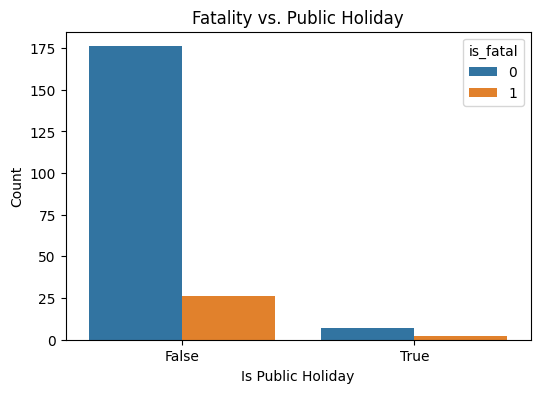

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_public_holiday_mt', hue='is_fatal')
plt.title('Fatality vs. Public Holiday')
plt.xlabel('Is Public Holiday')
plt.ylabel('Count')
plt.show()

#### School Holiday by Fatality

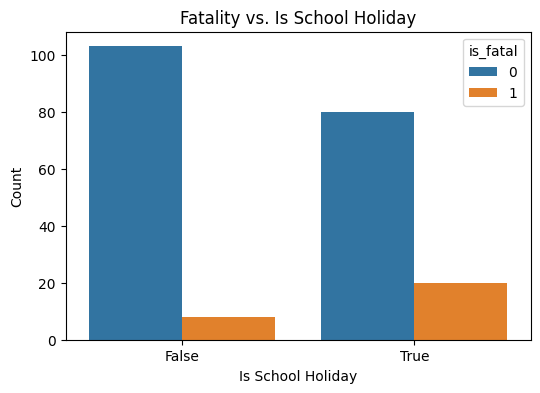

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_school_holiday_mt', hue='is_fatal')
plt.title('Fatality vs. Is School Holiday')
plt.xlabel('Is School Holiday')
plt.ylabel('Count')
plt.show()

#### School Day by Fatality

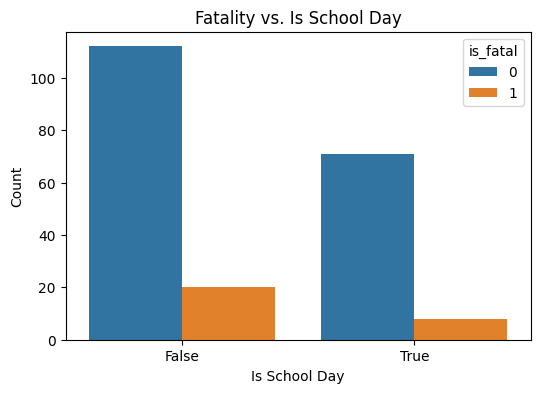

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_school_day_mt', hue='is_fatal')
plt.title('Fatality vs. Is School Day')
plt.xlabel('Is School Day')
plt.ylabel('Count')
plt.show()

#### Overall

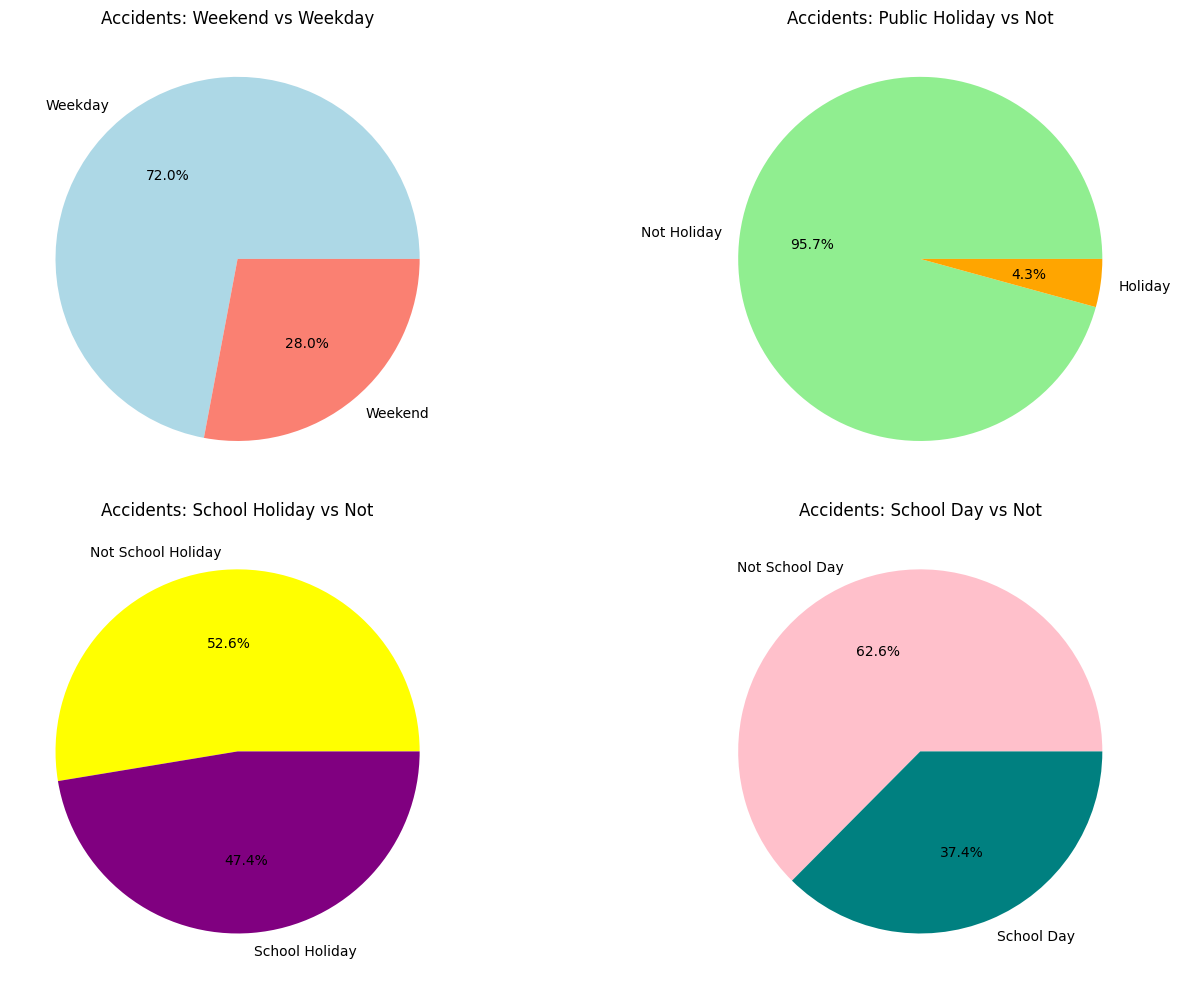

In [40]:
weekend_counts = df['is_weekend'].value_counts()
holiday_counts = df['is_public_holiday_mt'].value_counts()
school_holiday_counts = df['is_school_holiday_mt'].value_counts()
school_day_counts = df['is_school_day_mt'].value_counts()

# Visualize special days
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Weekend
weekend_counts.plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', 
                    labels=['Weekday', 'Weekend'], colors=['lightblue', 'salmon'])
axes[0, 0].set_title('Accidents: Weekend vs Weekday')
axes[0, 0].set_ylabel('')

# Public Holiday
holiday_counts.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', 
                    labels=['Not Holiday', 'Holiday'], colors=['lightgreen', 'orange'])
axes[0, 1].set_title('Accidents: Public Holiday vs Not')
axes[0, 1].set_ylabel('')

# School Holiday
school_holiday_counts.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', 
                           labels=['Not School Holiday', 'School Holiday'], colors=['yellow', 'purple'])
axes[1, 0].set_title('Accidents: School Holiday vs Not')
axes[1, 0].set_ylabel('')

# School Day
school_day_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', 
                       labels=['Not School Day', 'School Day'], colors=['pink', 'teal'])
axes[1, 1].set_title('Accidents: School Day vs Not')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

### Correlation Analysis

In [41]:
corr_df = df[[
    "num_drivers_under_18",
    "num_drivers_18_to_24",
    "num_drivers_25_to_49",
    "num_drivers_50_to_64",
    "num_drivers_65_plus",
    "num_drivers_age_unknown",
    "num_drivers_male",
    "num_drivers_female",
    "num_drivers_gender_unknown",
    "num_drivers_total",
    "num_vehicle_unknown",
    "num_vehicle_pedestrian",
    "num_vehicle_bicycle",
    "num_vehicle_motorbike",
    "num_vehicle_car",
    "num_vehicle_van",
    "num_vehicle_bus",
    "is_weekend",
    "is_public_holiday_mt",
    "is_school_holiday_mt",
    "is_school_day_mt",
    "temperature_max",
    "temperature_min",
    "temperature_mean",
    "windspeed_max",
    "precipitation_sum",
    "is_raining",
    "traffic_level",
    "total_injured",
    "is_fatal",
]]

corr_df["traffic_level"] = df["traffic_level"].map(
    lambda x: 0 if x == 'LOW' else (1 if x == 'MODERATE' else 2)
)

print("DataFrame to check for correlation:")
corr_df

DataFrame to check for correlation:


,num_drivers_under_18,num_drivers_18_to_24,num_drivers_25_to_49,num_drivers_50_to_64,num_drivers_65_plus,num_drivers_age_unknown,num_drivers_male,num_drivers_female,num_drivers_gender_unknown,num_drivers_total,...,is_school_day_mt,temperature_max,temperature_min,temperature_mean,windspeed_max,precipitation_sum,is_raining,traffic_level,total_injured,is_fatal
8,0,0,0,0,0,1,0,1,0,1,...,False,19.8,12.1,16.0,20.9,0.0,False,0,0,0
9,0,0,1,0,0,1,2,0,0,2,...,True,26.5,20.8,23.5,22.7,7.3,True,0,0,0
10,0,0,0,0,1,1,1,0,1,2,...,True,19.5,14.7,17.6,21.9,1.1,True,1,0,0
11,0,0,1,0,0,0,0,1,0,1,...,True,18.0,12.1,14.9,9.9,0.0,False,0,1,0
12,0,0,0,1,0,0,1,0,0,1,...,True,18.4,12.5,15.4,9.9,0.0,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,0,0,0,2,0,1,1,0,2,...,True,23.4,20.0,22.2,35.9,0.3,True,0,1,0
215,0,0,0,0,0,2,0,0,2,2,...,True,24.3,17.9,21.1,9.8,0.0,False,0,0,0
216,0,0,0,1,1,0,1,1,0,2,...,True,23.8,17.4,20.6,9.8,0.0,False,0,2,0
217,0,0,0,0,0,1,0,0,1,1,...,True,24.5,18.1,21.2,6.7,0.0,False,0,0,0


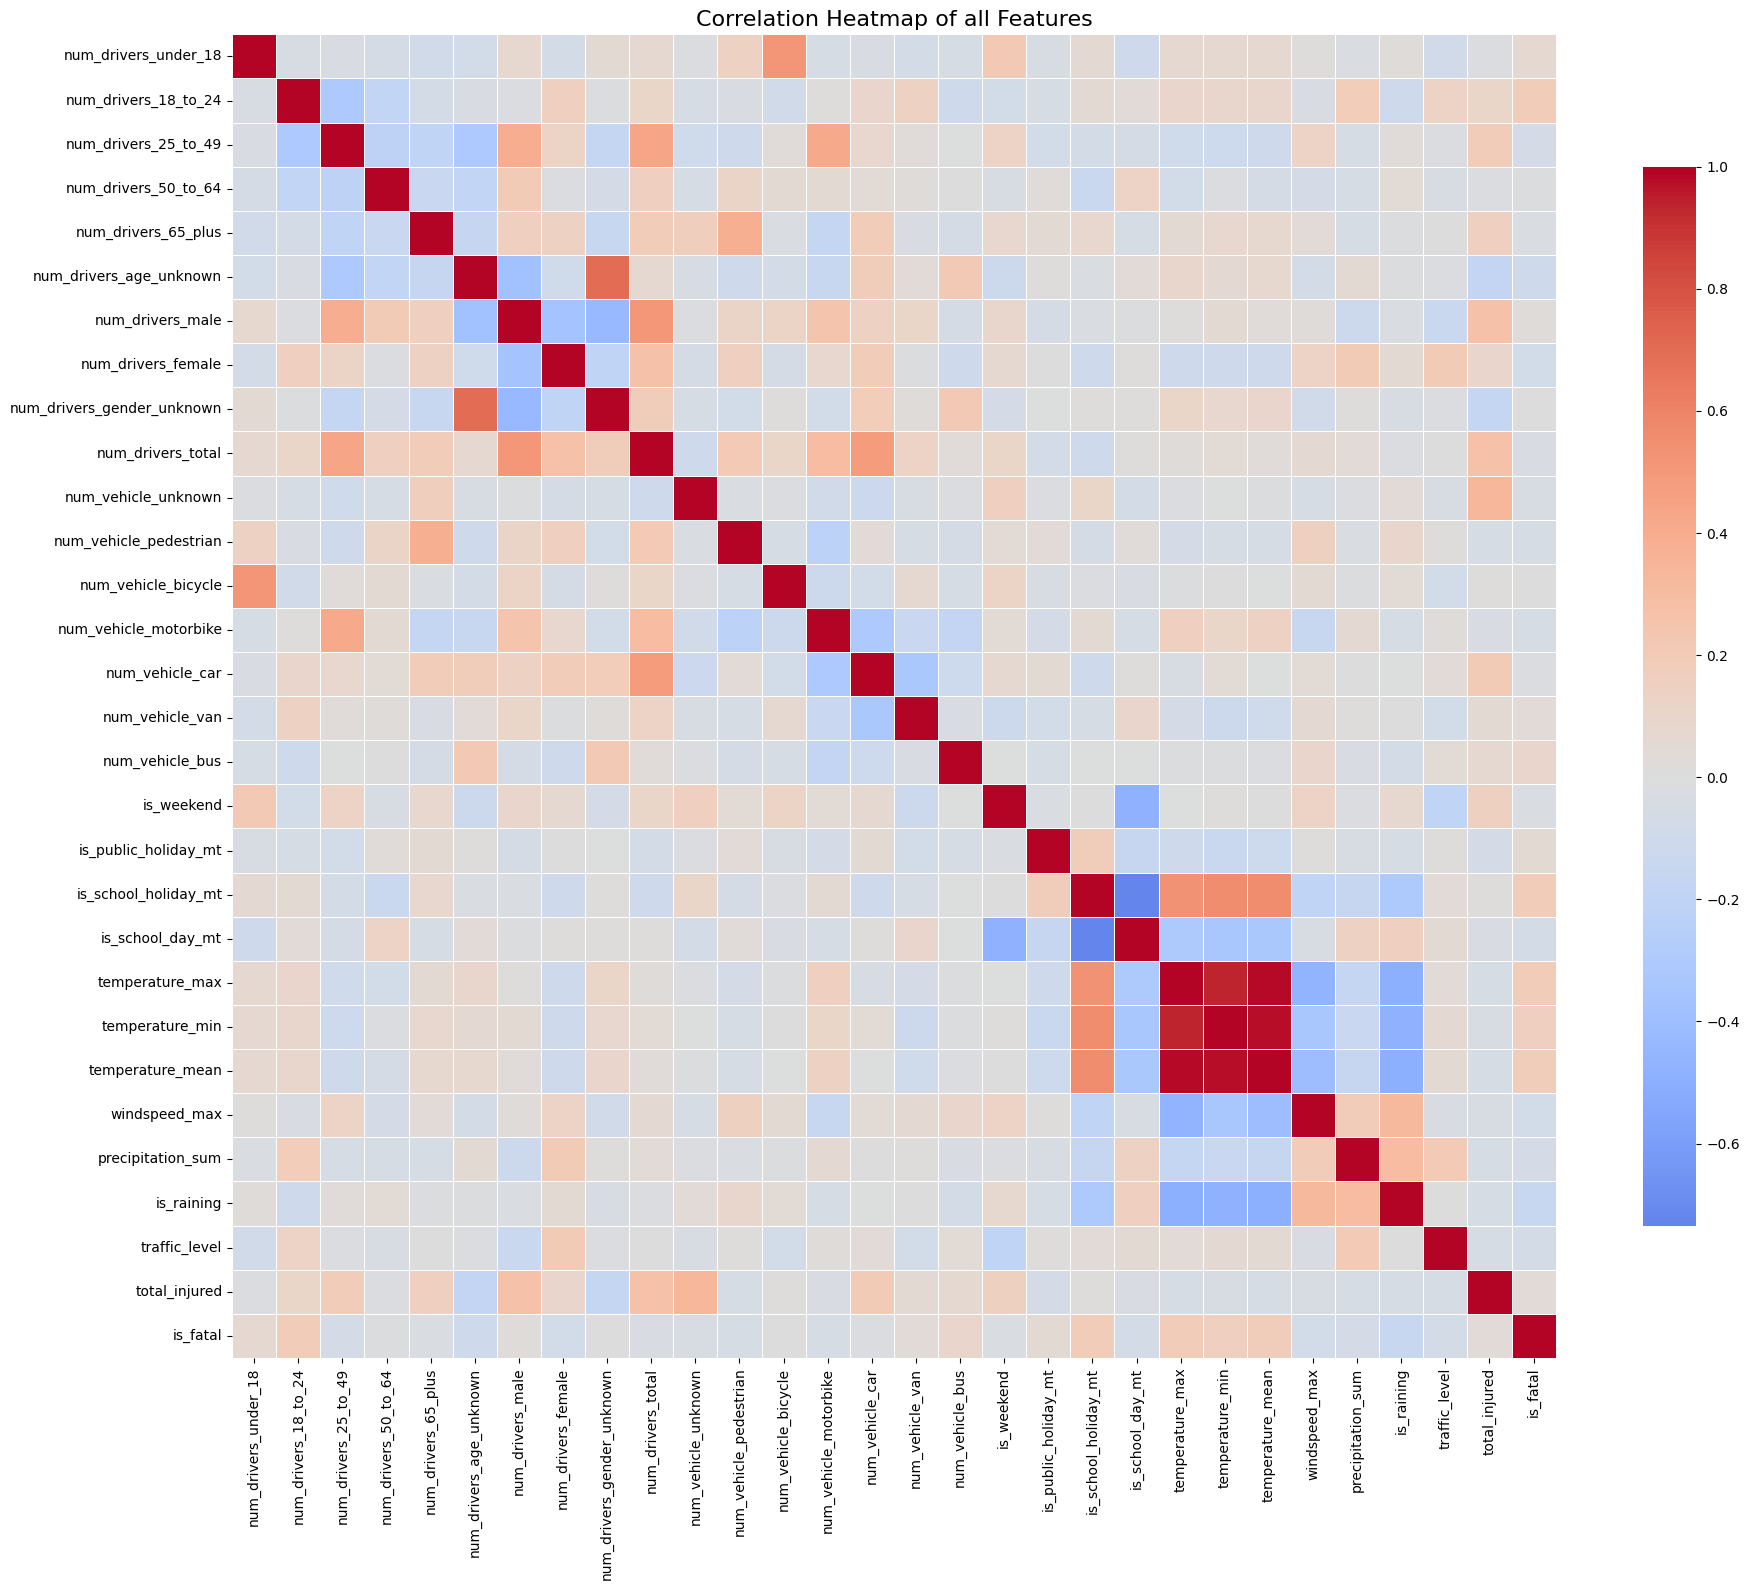

In [42]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of all Features', fontsize=16)
plt.tight_layout()
plt.show()

## Persist DataFrame

In [43]:
print(f"\nSaving {len(df)} rows to {data_post_eda_csv}")
df.to_csv(data_post_eda_csv, index=False)


Saving 211 rows to ../../data/final/data_post_eda.csv
